<a href="https://colab.research.google.com/github/DavoodSZ1993/Dive_into_Deep_Learning/blob/main/03_linear_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Linear Regression
## 01. Vectorization for Speed

In [2]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [3]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [4]:
class Timer:
  def __init__(self):
    self.times = []
    self.start()

  def start(self):
    self.tik = time.time()

  def stop(self):
    self.times.append(time.time() - self.tik)
    return self.times[-1]

  def avg(self):
    return sum(self.times) / len(self.times)

  def sum(self):
    return sum(self.time)

  def cumsum(self):
    return np.array(self.times).cumsum().tolist()

In [5]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
  c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.16141 sec'

In [6]:
timer.start()
d = a + b
f'{timer.stop(): .5f} sec'

' 0.00021 sec'

## 02. The Normal Distribution and Squared Loss

In [7]:
def normal(x, mu, sigma):
  p = 1 / math.sqrt(2 * math.pi * sigma**2)
  return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

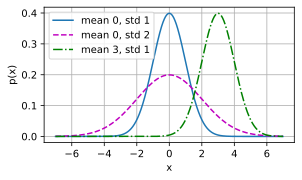

In [8]:
x = np.arange(-7, 7, 0.01)

params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

#### Linear Regression Implementation from Scratch

In [41]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

## 01. Generating the Dataset

In [42]:
def synthetic_data(w, b, num_examples):
  X = torch.normal(0, 1, (num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  return X, y.reshape((-1, 1))

In [43]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([ 0.5397, -0.3561]) 
label: tensor([6.4805])


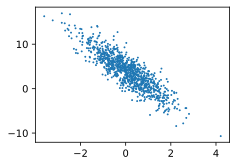

In [44]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1);

## 02. Reading the Dataset

In [45]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))

  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(indices[i:min(i + 
                                               batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

In [51]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break

tensor([[-1.6415,  0.5004],
        [ 0.3337,  0.1615],
        [ 1.1263,  0.0521],
        [ 1.1824,  1.1857],
        [-1.8137,  0.8591],
        [-1.2077,  0.6214],
        [-0.0162,  1.3444],
        [ 0.1135, -1.1094],
        [ 0.7112,  0.8365],
        [-0.3526,  0.0634]]) 
 tensor([[-0.7852],
        [ 4.3258],
        [ 6.2815],
        [ 2.5081],
        [-2.3726],
        [-0.3264],
        [-0.3862],
        [ 8.1958],
        [ 2.7814],
        [ 3.2834]])


## 03. Initializing Model Parameters

In [52]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## 04. Defining the Model

In [53]:
def linreg(X, w, b):
  return torch.matmul(X, w) + b

## 05. Defining the Loss Function

In [54]:
def squared_loss(y_hat, y):
  return (y_hat - y.reshape(y_hat.shape))**2 / 2

## 06. Defining the Optimization Algorithm

In [55]:
def sgd(params, lr, batch_size):
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()

## 07. Training

In [56]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [57]:
for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y)
    l.sum().backward()
    sgd([w, b], lr, batch_size)

  with torch.no_grad():
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.055824
epoch 2, loss 0.000253
epoch 3, loss 0.000051


In [58]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0004, -0.0005], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0007], grad_fn=<RsubBackward1>)
